In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yaml
from tabulate import tabulate

In [50]:
dataset_names = ['kuhar', 'motionsense', 'uci', 'wisdm', 'realworld_thigh', 'realworld_waist']

# 1 - No reducer

In [55]:
data = []
for dataset in dataset_names:
    unit = {}
    unit['dataset'] = dataset
    with open(f'../execute_once_experiments/scores/no_reducer_{dataset}.yaml', 'r') as f:
        score = yaml.load(f, Loader=yaml.FullLoader)
        unit['b_old'] = score['score']
    with open(f'../execute_once_experiments/scores/balanced_patrick_no_reducer_{dataset}.yaml', 'r') as f:
        score = yaml.load(f, Loader=yaml.FullLoader)
        unit['b_patrick'] = score['score']
    unit['b_pat - b_old'] = unit['b_patrick'] - unit['b_old']
    data.append(unit)
print(tabulate(data, headers='keys', tablefmt='psql'))

+-----------------+----------+-------------+-----------------+
| dataset         |    b_old |   b_patrick |   b_pat - b_old |
|-----------------+----------+-------------+-----------------|
| kuhar           | 0.671127 |    0.693897 |      0.02277    |
| motionsense     | 0.785952 |    0.899333 |      0.113381   |
| uci             | 0.847059 |    0.857059 |      0.01       |
| wisdm           | 0.747373 |    0.745847 |     -0.00152542 |
| realworld_thigh | 0.671521 |    0.576037 |     -0.0954842  |
| realworld_waist | 0.787217 |    0.790939 |      0.00372168 |
+-----------------+----------+-------------+-----------------+


# 2 - The best old in KuHar, now

In [52]:
print('Best configuration of old-balanced KUHAR')
with open(f'../experiments/umap_kuhar_p100/best.yaml', 'r') as f:
    score = yaml.load(f, Loader=yaml.FullLoader)
    for key in score['config']:
        print(key, score['config'][key])
    print('Old best score:', score['score'])

with open(f'../execute_once_experiments/scores/balanced_patrick_umap_kuhar_p100_best.yaml', 'r') as f:
    score = yaml.load(f, Loader=yaml.FullLoader)
    print('New best score:', score['score'])

Best configuration of old-balanced KUHAR
umap_epochs 173
umap_mdist 0.17469232166208573
umap_ncomp 334
umap_neigh 5
umap_spread 1.9923078093206665
Old best score: 0.41784037558685444
New best score: 0.3873239436619718


# 3 - Comparing hyperparameters explorations

Text(0, 0.5, 'Best accuracy obtained after hyperparameters search')

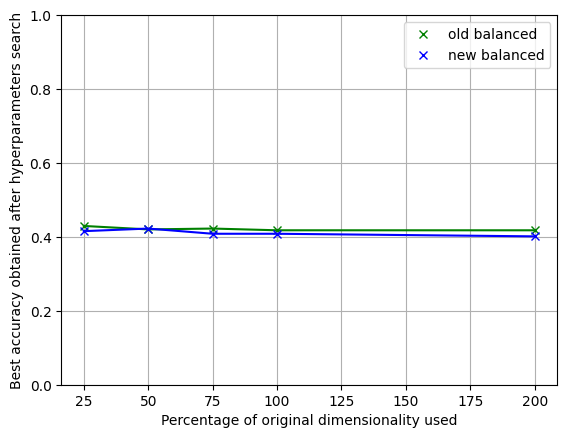

In [53]:
percentages = [25, 50, 75, 100, 200]

data_old = []
data_new = []

for p in percentages:
    with open(f'../experiments/umap_kuhar_p{p}/best.yaml') as f:
        score = yaml.load(f, Loader=yaml.FullLoader)
        data_old.append(score['score'])
    try:
        with open(f'../experiments/pbal_umap_kuhar_p{p}/best.yaml') as f:
            score = yaml.load(f, Loader=yaml.FullLoader)
            data_new.append(score['score'])
    except:
        data_new.append(np.nan)

plt.plot(percentages, data_old, color='green')
plt.plot(percentages, data_old, 'x', label='old balanced', color='green')
plt.plot(percentages, data_new, color='blue')
plt.plot(percentages, data_new, 'x', label='new balanced', color='blue')
plt.ylim(0, 1)
plt.legend()
plt.grid()
plt.xlabel('Percentage of original dimensionality used')
plt.ylabel('Best accuracy obtained after hyperparameters search')